**Neural Networks (NNs)**

Neural networks are computational models inspired by the brain.
They consist of layers of neurons (nodes) that process data.

Each neuron receives inputs, applies weights and biases, passes it through an activation function, and outputs a value.

They are used for tasks like classification, regression, image recognition, and natural language processing.

Learning happens by adjusting weights and biases to minimize a loss function using backpropagation.

Simple analogy: Think of it like a series of connected filters that transform input data into meaningful output.

**Convolutional Neural Networks (CNNs)**

A CNN is a type of neural network designed for images or grid-like data.

It uses convolution layers to automatically extract important features (like edges, shapes, textures).

Key components:

Convolution layers → detect features with small filters/kernels.

Pooling layers → reduce size and focus on important info.

Fully connected layers → combine features for final prediction.

CNNs are widely used in image recognition, object detection, and video analysis.

Simple analogy: A CNN is like looking at an image through many small windows that scan for patterns, then combining them to understand the whole picture.

In [ ]:
import numpy as np  # import numpy for numerical operations like arrays and math functions
import matplotlib.pyplot as plt  # import matplotlib for data visualization

# Placeholder definitions for demonstration
# In a real scenario, these would come from your dataset and model initialization.
X = np.random.rand(10, 5) # Example input with 10 samples and 5 features
w1 = np.random.rand(8, 5) # Weights for first layer (e.g., 5 input features, 8 neurons)
b1 = np.random.rand(8)    # Biases for first layer
w2 = np.random.rand(6, 8) # Weights for second layer (e.g., 8 input from first layer, 6 neurons)
b2 = np.random.rand(6)    # Biases for second layer
w3 = np.random.rand(3, 6) # Weights for third layer (e.g., 6 input from second layer, 3 output classes)
b3 = np.random.rand(3)    # Biases for third layer

loss = -np.log(
    (  # Start of numerator expression for the division
        np.sum(
            np.exp(  # Removed y=
                np.dot(
                    np.maximum(
                        0,
                        np.dot(
                            X,
                            w1.T
                        ) + b1
                    ),
                    w2.T
                ) + b2
            )
        ) + b3
    ) /  # End of numerator expression

    (  # Start of denominator expression for the division
        np.sum(
            np.exp(
                np.dot(
                    np.maximum(
                        0,
                        np.dot(
                            np.maximum(
                                0,
                                np.dot(
                                    X,
                                    w1.T
                                ) + b1
                            ),
                            w2.T
                        ) + b2
                    ),
                    w3.T
                ) + b3
            ),
            axis = 1,
            keepdims = True
        )
    ) # End of denominator expression
)

#Neural Networks from Scratch - P.1 Intro and Neuron Code

In [ ]:
import sys
import numpy as np
import matplotlib

print("Python:", sys.version)
print("NumPy:", np.__version__)
print("Matplotlib:", matplotlib.__version__)

Python: 3.12.12 (main, Oct 10 2025, 08:52:57) [GCC 11.4.0]
NumPy: 2.0.2
Matplotlib: 3.10.0


In [ ]:
input  = [1, 2, 3, 2.5] #outputs from 3 neurons from the previous layer
weights = [0.2, 0.8, -0.5, 1.0]
bias = 2.0

output = np.dot(weights, input) + bias #inputs[0]*weights[0] + inputs[1]*weights[1] + inputs[2]*weights[2] + bias
print(output)

4.8


#Neural Networks from Scratch - P.2 Coding a Layer


##Neural Networks from Scratch - P.3 The Dot Product

In [ ]:
inputs = [1, 2, 3, 2.5]
# Input values coming from the previous layer (or raw data)

weights = [
    [0.2, 0.8, -0.5, 1.0],     # Weights for neuron 1 (one weight per input)
    [0.5, -0.91, 0.26, -0.5],  # Weights for neuron 2
    [-0.26, -0.27, 0.17, 0.87] # Weights for neuron 3
]

biases = [2, 3, 0.5]
# Bias value added to each neuron’s weighted sum

layer_outputs = []
# This will store the final output of each neuron in this layer

for neuron_weights, neuron_bias in zip(weights, biases):
    # Loop through each neuron’s weights and its corresponding bias

    neuron_output = 0
    # Start the neuron’s output at 0 (this will become the weighted sum)

    for n_input, weight in zip(inputs, neuron_weights):
        # Loop through each input value and its matching weight

        neuron_output += n_input * weight
        # Multiply input by weight and add it to the neuron’s total

    neuron_output += neuron_bias
    # Add the bias after summing all weighted inputs

    layer_outputs.append(neuron_output)
    # Save this neuron’s output in the layer’s output list

print(layer_outputs)
# Print outputs of all neurons in this layer


[4.8, 1.21, 2.385]


In [ ]:
#3 neurons 4 inputs
#weights and biases tune the values to fit to data , they affect the output
'''
inputs  = [1, 2, 3, 2.5]
weights1 = [0.2, 0.8, -0.5, 1.0]
weights2 = [0.5, -0.91, 0.26, -0.5]
weights3 = [-0.26, -0.27, 0.17, 0.87]

bias1 = 2
bias2 = 3
bias3 = 0.5

output = [
    np.dot(weights1, inputs) + bias1,
    np.dot(weights2, inputs) + bias2,
    np.dot(weights3, inputs) + bias3
]
print(output) '''

inputs = [1, 2, 3, 2.5]

weights = [
    [0.2, 0.8, -0.5, 1.0],
    [0.5, -0.91, 0.26, -0.5],
    [-0.26, -0.27, 0.17, 0.87]
]

biases = [2, 3, 0.5]

output = np.dot(weights, inputs) + biases # 3x4 and 4 , no dim error since 1d is considered as column vector
#output = np.dot(inputs, weights) + biases #give dim error!
print(output)

[4.8   1.21  2.385]


###Shape

In [ ]:
import numpy as np

one_dlist = [1,5,6,2]
print("This is a 1 dimensional list with 4 elements: ",one_dlist, "\n and its a 1D array, vector" )
print("\tShape of one_dlist is:" ,np.shape(one_dlist))

two_dlist = [[1,5,6,2],
             [3,2,1,3]]
#same shape two lists
#two rows 4 columns
print("\nThis is a 2 dimensional list with 8 elements: ",two_dlist, "\n and its a 2D array, matrix" )
print("\tShape of two_dlist is:" ,np.shape(two_dlist))

three_dlist = [[[1,5,6,2],
               [3,2,1,3],
               [5,2,1,2]]]
#same shape two lists
# A 3D list (tensor):
# - 1 block (depth)
# - 3 rows
# - 4 columns
print("\nThis is a 3 dimensional list with 12 elements: ",three_dlist, "\n and its a 3D array" )
print("\tShape of three_dlist is:" ,np.shape(three_dlist))


three_dlist2 = [
    [[1, 5, 6, 2],
     [3, 2, 1, 3]],

    [[5, 2, 1, 2],
     [6, 4, 8, 4]],

    [[2, 8, 5, 3],
     [1, 1, 9, 4]]
]
# This is a 3D list:
# - 3 blocks
# - each block has 2 rows
# - each row has 4 elements

print("\nThis is a 3 dimensional list with 24 elements:")
print(three_dlist2)

print("\tShape of n_dlist is:", np.shape(three_dlist2))


four_dlist = [
    [   # Block 1
        [   # Matrix 1
            [1, 5, 6, 2],
            [3, 2, 1, 3],
            [5, 2, 1, 2]
        ],
        [   # Matrix 2
            [2, 3, 4, 1],
            [6, 5, 4, 3],
            [1, 2, 3, 4]
        ]
    ],
    [   # Block 2
        [   # Matrix 1
            [4, 1, 3, 2],
            [2, 6, 5, 1],
            [3, 4, 2, 6]
        ],
        [   # Matrix 2
            [7, 3, 1, 5],
            [2, 4, 6, 8],
            [9, 1, 2, 3]
        ]
    ]
]
# This is a 4D list:
# - 2 batches (or blocks)
# - 2 matrices per batch
# - 3 rows per matrix
# - 4 columns per row

print("\nThis is a 4 dimensional list (tensor):")
print(four_dlist)

print("\tShape of four_dlist is:", np.shape(four_dlist))

#[ ... ] → adds a dimension

#[[ ... ]] → adds another

#[[[ ... ]]] → another


This is a 1 dimensional list with 4 elements:  [1, 5, 6, 2] 
 and its a 1D array, vector
	Shape of one_dlist is: (4,)

This is a 2 dimensional list with 8 elements:  [[1, 5, 6, 2], [3, 2, 1, 3]] 
 and its a 2D array, matrix
	Shape of two_dlist is: (2, 4)

This is a 3 dimensional list with 12 elements:  [[[1, 5, 6, 2], [3, 2, 1, 3], [5, 2, 1, 2]]] 
 and its a 3D array
	Shape of three_dlist is: (1, 3, 4)

This is a 3 dimensional list with 24 elements:
[[[1, 5, 6, 2], [3, 2, 1, 3]], [[5, 2, 1, 2], [6, 4, 8, 4]], [[2, 8, 5, 3], [1, 1, 9, 4]]]
	Shape of n_dlist is: (3, 2, 4)

This is a 4 dimensional list (tensor):
[[[[1, 5, 6, 2], [3, 2, 1, 3], [5, 2, 1, 2]], [[2, 3, 4, 1], [6, 5, 4, 3], [1, 2, 3, 4]]], [[[4, 1, 3, 2], [2, 6, 5, 1], [3, 4, 2, 6]], [[7, 3, 1, 5], [2, 4, 6, 8], [9, 1, 2, 3]]]]
	Shape of four_dlist is: (2, 2, 3, 4)


In [ ]:
import numpy as np

inputs = [1, 2, 3, 2.5]

weights = [
    [0.2, 0.8, -0.5, 1.0],
    [0.5, -0.91, 0.26, -0.5],
    [-0.26, -0.27, 0.17, 0.87]
]

dot_matrix = np.dot(weights, inputs)

dot_manual = [
    np.dot(weights[0], inputs),
    np.dot(weights[1], inputs),
    np.dot(weights[2], inputs)
]

print(dot_matrix)
print(dot_manual)

#output = ReLU(weight*input + bias)
#y = mx + b

[ 2.8   -1.79   1.885]
[np.float64(2.8), np.float64(-1.79), np.float64(1.8849999999999998)]


#Neural Networks from Scratch - P.4 Batches, Layers, and Objects


😊When training a neural network, you usually don’t feed all your data at once. Instead, you split it into smaller groups called batches. The *batch size* is simply the number of samples in one batch.

🤓For example:

If you have 1000 training examples and a batch size of 100, the network will process 10 batches per training epoch.

If batch size = 1 → you’re doing stochastic gradient descent (one sample at a time).

If batch size = total dataset → you’re doing full-batch gradient descent.

🤓Why we use batches?

**Memory efficiency:** A large dataset might not fit into RAM/GPU if processed all at once.

**Faster training:** Using batches allows parallel computation.

**Better optimization:** Sometimes small batches introduce “noise” in gradient updates, which can help escape local minima.

In [ ]:
inputs = [
    [1, 2, 3, 2.5],
    [2.0, 5.0, -1.0, 2.0],
    [-1.5, 2.7, 3.3, -0.8]
]
weights = [
    [0.2, 0.8, -0.5, 1.0],
    [0.5, -0.91, 0.26, -0.5],
    [-0.26, -0.27, 0.17, 0.87]
]
biases = [2, 3, 0.5]

output = np.dot( inputs, np.array(weights).T ) + biases
print(output)


[[ 4.8    1.21   2.385]
 [ 8.9   -1.81   0.2  ]
 [ 1.41   1.051  0.026]]


👍The first layer always takes the “real” input data from your dataset. That’s why we have inputs1.

The second layer doesn’t take the raw dataset; it takes the outputs of the previous layer as its input.

In [ ]:
#first layer:
inputs = [[1, 2, 3, 2.5],
          [2.0, 5.0, -1.0, 2.0],
          [-1.5, 2.7, 3.3, -0.8]]
weights1 = [[0.2, 0.8, -0.5, 1.0],
           [0.5, -0.91, 0.26, -0.5],
           [-0.26, -0.27, 0.17, 0.87]]
biases1 = [2, 3, 0.5]

#second layer:
weights2 = [[0.1, -0.14, 0.5],
           [-0.5, 0.12, -0.33],
           [-0.44, 0.73, -0.13]]
biases2 = [-1, 2, -0.5]

layer1_outputs = np.dot( inputs, np.array(weights1).T ) + biases1
layer2_outputs = np.dot( layer1_outputs, np.array(weights2).T ) + biases2
print("first layer:\n", layer1_outputs, "\n\n\nsecond layer:\n", layer2_outputs)

first layer:
 [[ 4.8    1.21   2.385]
 [ 8.9   -1.81   0.2  ]
 [ 1.41   1.051  0.026]] 


second layer:
 [[ 0.5031  -1.04185 -2.03875]
 [ 0.2434  -2.7332  -5.7633 ]
 [-0.99314  1.41254 -0.35655]]


In [ ]:
import numpy as np
np.random.seed(0)  # reproducible results

# sample (input/raw) training data: 3 samples, each with 4 features
X = [
    [1, 2, 3, 2.5],  #first sample
    [2.0, 5.0, -1.0, 2.0],  #second sample
    [-1.5, 2.7, 3.3, -0.8]  #third sample
]

# define a dense (fully connected) layer class
class Layer_Dense:
    def __init__(self, n_inputs, n_neurons):
        # initialize weights: small random numbers (normal distribution) scaled by 0.10
        # shape = (number of inputs, number of neurons)
        # we do NOT need to transpose because numpy dot will handle shapes correctly
        self.weights = 0.10 * np.random.randn(n_inputs, n_neurons)
        self.biases = np.zeros((1, n_neurons))

    # forward method placeholder (not implemented yet)
    def forward(self):
        pass

# show the random weights generated for shape (4,3)
print(0.10*np.random.randn(4,3))  # prints a 4x3 array of small random numbers


[[ 0.17640523  0.04001572  0.0978738 ]
 [ 0.22408932  0.1867558  -0.09772779]
 [ 0.09500884 -0.01513572 -0.01032189]
 [ 0.04105985  0.01440436  0.14542735]]


In [ ]:
import numpy as np
np.random.seed(0)

# sample (raw) training data: 3 samples, each with 4 features
X = [
    [1, 2, 3, 2.5],        # sample 1
    [2.0, 5.0, -1.0, 2.0], # sample 2
    [-1.5, 2.7, 3.3, -0.8] # sample 3
]

# define a dense (fully connected) layer class
class Layer_Dense:
    def __init__(self, n_inputs, n_neurons):
        self.weights = 0.10 * np.random.randn(n_inputs, n_neurons)
        self.biases = np.zeros((1, n_neurons))

    def forward(self, inputs):
        self.output = np.dot(inputs, self.weights) + self.biases

layer1 = Layer_Dense(4, 5)
layer2 = Layer_Dense(5, 2)

layer1.forward(X)
print("layer1.output is:\n", layer1.output)
layer2.forward(layer1.output)
print("\n\nlayer2.output is:\n", layer2.output)




layer1.output is:
 [[ 0.10758131  1.03983522  0.24462411  0.31821498  0.18851053]
 [-0.08349796  0.70846411  0.00293357  0.44701525  0.36360538]
 [-0.50763245  0.55688422  0.07987797 -0.34889573  0.04553042]]


layer2.output is:
 [[ 0.148296   -0.08397602]
 [ 0.14100315 -0.01340469]
 [ 0.20124979 -0.07290616]]


#Neural Networks from Scratch - P.5 Hidden Layer Activation Functions


🧠 Activation Functions — What They Do

An activation function decides how a neuron’s weighted sum (input) gets transformed into an output.
Without them, neural networks would be just linear maps and couldn’t learn complex patterns.



1. Linear (Identity)

Formula: f(x) = x

Outputs exactly the input (scaled if you use a constant).

Use case: Output layer for regression or continuous prediction.

Limitation: No non‑linearity → network behaves like a single linear transformation no matter how deep it is.

2. Step / Binary Step

Outputs 0 or 1 depending on a threshold.

Historically used in early perceptrons.

Drawbacks: Not differentiable → not useful for backpropagation.



🔥 Common Non‑Linear Activation Functions

These introduce non‑linearity so that neural networks learn complex relationships.

3. Sigmoid (Logistic)

Range: (0, 1) — great for outputs interpreted as probabilities.

Good for binary classification output layers.

Downside: Vanishing gradient for deep networks.

4. Tanh (Hyperbolic Tangent)

Range: (−1, 1) — zero‑centered, which can help optimization.

Sometimes preferred over sigmoid in hidden layers.

Also suffers from vanishing gradients on large values.

5. ReLU (Rectified Linear Unit)

Formula: f(x) = max(0, x)

Outputs 0 for negative, linear for positive.

Most popular for hidden layers — simple and efficient.

Issue: “Dying ReLU” neurons that always output 0.

6. Leaky ReLU

Variation of ReLU that allows a small negative slope instead of 0.

Helps avoid neurons dying completely.

🙌(most popular for hidden layers) 7. Parametric ReLU (PReLU)

Like Leaky ReLU, but the negative slope is learned during training.

More flexible, at the cost of more parameters.

8. ELU (Exponential Linear Unit)

Smooths the negative part with an exponential curve.

Keeps negative outputs, which can help training.

9. GELU (Gaussian Error Linear Unit)

A “smoothed ReLU” that multiplies input by a probability factor.

Used in modern NLP models (like transformers).

10. Swish

A smooth, non‑monotonic function combining x and logistic.

Often performs better than ReLU in deep networks.

11. Softmax

Converts a vector to probabilities that sum to 1.

Perfect for multi‑class classification output layers.

12. Softplus

Smooth approximation of ReLU.

Differentiable everywhere; used sometimes in place of ReLU.



🙂Other less common / experimental ones

Hard Sigmoid / Hard Swish: Faster approximations of Sigmoid or Swish.

Maxout: Chooses maximum among multiple linear inputs; useful in some architectures.

Thresholded ReLU: Only outputs positive values above a threshold.

Bent Identity, Sin, Cos, Gaussian, etc.: Mostly used in research or special applications.

👍Generally the output layer has a different activation function that is being used in hidden layers

In [ ]:
inputs = [0,2,-1,3.3,-2.7,1.1,2.2,-100]
output = []

#ReLU activation function:
for items in inputs:
  if items>0:
    output.append(items)
  elif items<=0:
    output.append(0)

print(output)

#for i in inputs:
    #output.append(max(0,i))
#print(output)

[0, 2, 0, 3.3, 0, 1.1, 2.2, 0]


In [ ]:
import numpy as np  #import required libraries
#np.random.seed(42)   #same random numbers at every compilation
!pip install nnfs
# import nnfs library (prepares neural network environment)
import nnfs
nnfs.init()  # initializes random seed and float precision for consistency in neural networks

# sample (raw) training data: 3 samples, each with 4 features -> 2D array
X = np.array([
    [1, 2, 3, 2.5],        # sample 1
    [2.0, 5.0, -1.0, 2.0], # sample 2
    [-1.5, 2.7, 3.3, -0.8] # sample 3
     ])

# define a dense (fully connected) layer class
class Layer_Dense:
    def __init__(self, n_inputs, n_neurons):
        self.weights = 0.10 * np.random.randn(n_inputs, n_neurons)
        self.biases = np.zeros((1, n_neurons))
    def forward(self, inputs):
        self.output = np.dot(inputs, self.weights) + self.biases

# ReLU activation function
class Activation_ReLU:
  def forward(self, inputs):
     self.output = np.maximum(0, inputs)


layer1 = Layer_Dense(4, 5)
layer2 = Layer_Dense(5, 2)

layer1.forward(X)
print("layer1.output is:\n", layer1.output)
layer2.forward(layer1.output)
print("\n\nlayer2.output is:\n", layer2.output)

layer1.output is:
 [[ 0.10758132  1.0398352   0.2446241   0.31821495  0.18851054]
 [-0.08349796  0.70846415  0.00293357  0.44701523  0.3636054 ]
 [-0.50763243  0.5568842   0.07987796 -0.34889573  0.04553042]]


layer2.output is:
 [[ 0.148296   -0.08397602]
 [ 0.14100316 -0.01340469]
 [ 0.20124978 -0.07290616]]


here


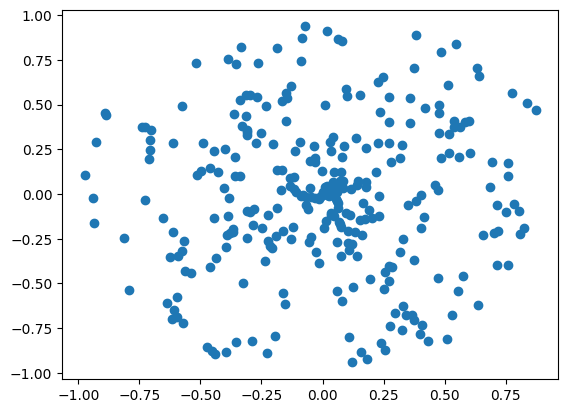

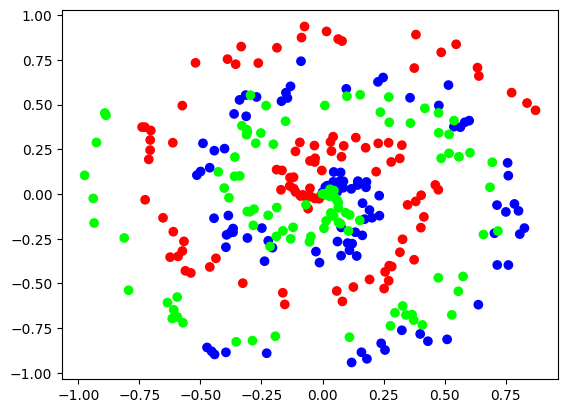

In [ ]:
import numpy as np
np.random.seed(42)

# define a function to create synthetic 2D data for classification
def create_data(points, classes):
    # X will hold the coordinates of all points, shape = (points * classes, 2)
    X = np.zeros((points*classes, 2))

    # y will hold the class labels
    # 'uint8' type because labels are small integers
    y = np.zeros(points*classes, dtype='uint8')

    for class_number in range(classes):
        # define indices in X/y that belong to this class
        ix = range(points*class_number, points*(class_number+1))

        # r: radius from origin, linearly spaced between 0 and 1
        r = np.linspace(0.0, 1, points)

        # t: angle for each point, spread out for each class with some random noise
        t = np.linspace(class_number*4, (class_number+1)*4, points) + np.random.randn(points)*0.2

        # generate x and y coordinates using polar-to-cartesian conversion
        # np.c_[] combines columns: first column = r*sin(t*2.5), second column = r*cos(t*2.5)
        X[ix] = np.c_[r*np.sin(t*2.5), r*np.cos(t*2.5)]

        # assign class labels to y
        y[ix] = class_number

    # return the features and labels
    return X, y

import matplotlib.pyplot as plt
print("here")

# create data with 100 points per class, 3 classes
X, y = create_data(100, 3)

# plot the points without class colors (just scatter plot)
plt.scatter(X[:,0], X[:,1])
plt.show()

# plot points colored by class using the "brg" colormap
plt.scatter(X[:,0], X[:,1], c=y, cmap="brg")
plt.show()


✨Key Points:

This code generates synthetic spiral-like 2D data for multi-class classification.

X contains the coordinates, y contains the class labels.

np.c_[] is a convenient way to combine columns into a 2D array.

The scatter plots help visualize the data before training a model.

#Neural Networks from Scratch - P.6 Softmax Activation

Softmax is an activation function used at the output layer of a neural network when you want the model to choose one class out of many.

Where Softmax is used

✅ Multi-class classification (e.g., digits 0–9, image categories, language tokens)

❌ Not used in hidden layers (usually too restrictive)

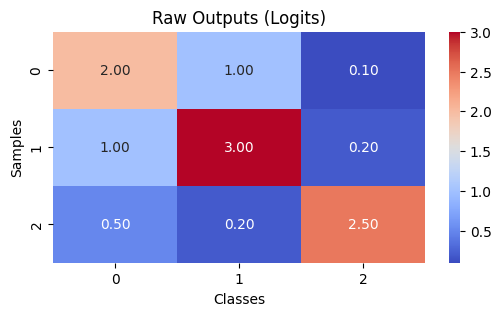

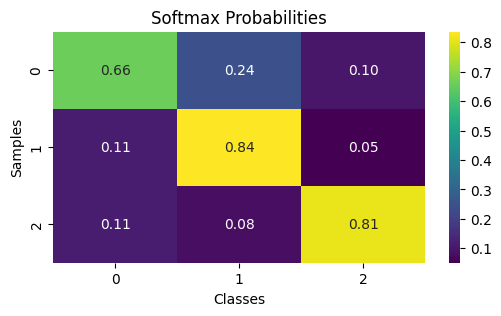

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Softmax function
def softmax(inputs):
    exp_values = np.exp(inputs - np.max(inputs, axis=1, keepdims=True))
    probabilities = exp_values / np.sum(exp_values, axis=1, keepdims=True)
    return probabilities

# Example raw outputs (logits)
# rows = samples, columns = classes
logits = np.array([
    [2.0, 1.0, 0.1],
    [1.0, 3.0, 0.2],
    [0.5, 0.2, 2.5]
])

# Apply softmax
probs = softmax(logits)

# Plot raw logits
plt.figure(figsize=(6, 3))
sns.heatmap(logits, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Raw Outputs (Logits)")
plt.xlabel("Classes")
plt.ylabel("Samples")
plt.show()

# Plot softmax probabilities
plt.figure(figsize=(6, 3))
sns.heatmap(probs, annot=True, cmap="viridis", fmt=".2f")
plt.title("Softmax Probabilities")
plt.xlabel("Classes")
plt.ylabel("Samples")
plt.show()


In [ ]:
import math
layer_outputs = [4.8, 1.21, 2.385]
#E = 2.71828182846
#used exp to convert negative to positives without losing its value/meaning

#exponentiation
E = math.e
exp_values = []

for output in layer_outputs:
     exp_values.append(E**output)
print("exp_values is:", exp_values)

#normalisation
norm_base = sum(exp_values)
norm_values = []

for value in exp_values:
     norm_values.append(value / norm_base)
print("\nnorm_values is:", norm_values)
print("\nsum of norm values is:", sum(norm_values)) #very close to 1




exp_values is: [121.51041751873483, 3.353484652549023, 10.859062664920513]

norm_values is: [0.8952826639572619, 0.024708306782099374, 0.0800090292606387]

sum of norm values is: 0.9999999999999999


input -> **Exponentiate -> Normalize -> (softmax)**
->Output

In [ ]:
import math
import numpy as np

layer_outputs = [4.8, 1.21, 2.385]
E = math.e

#exponentiation
exp_values = np.exp(layer_outputs)
print("exp_values is:", exp_values)

#normalisation
norm_values = exp_values / np.sum(exp_values)
print("\nnorm_values is:", norm_values)
print("\nsum of norm values is:", sum(norm_values)) #very close to 1



exp_values is: [121.51041752   3.35348465  10.85906266]

norm_values is: [0.89528266 0.02470831 0.08000903]

sum of norm values is: 0.9999999999999999


In [ ]:
import math
import numpy as np
layer_outputs = [[4.8, 1.21, 2.385],
                [8.9, -1.81, 0.2],
                [1.41, 1.051, 0.026]]
E = math.e
exp_values = np.exp(layer_outputs)
#print(np.sum(layer_outputs, axis=1, keepdims = True))

norm_values = exp_values / np.sum(exp_values,axis=1,keepdims=True)
print("\nnorm_values is:", norm_values)



norm_values is: [[8.95282664e-01 2.47083068e-02 8.00090293e-02]
 [9.99811129e-01 2.23163963e-05 1.66554348e-04]
 [5.13097164e-01 3.58333899e-01 1.28568936e-01]]


In [ ]:
import math
import numpy as np
layer_outputs = [[4.8, 1.21, 2.385],
                [8.9, -1.81, 0.2],
                [1.41, 1.051, 0.026]]
E = math.e
exp_values = np.exp(layer_outputs)
#print(np.sum(layer_outputs, axis=1, keepdims = True))

norm_values = exp_values / np.sum(exp_values,axis=1,keepdims=True)
print("\nnorm_values is:", norm_values)



norm_values is: [[8.95282664e-01 2.47083068e-02 8.00090293e-02]
 [9.99811129e-01 2.23163963e-05 1.66554348e-04]
 [5.13097164e-01 3.58333899e-01 1.28568936e-01]]


##combat overflow!

First 5 probability outputs:
 [[0.33333334 0.33333334 0.33333334]
 [0.33331734 0.3333183  0.33336434]
 [0.3332888  0.33329153 0.33341965]
 [0.33325943 0.33326396 0.33347666]
 [0.33323312 0.33323926 0.33352762]]


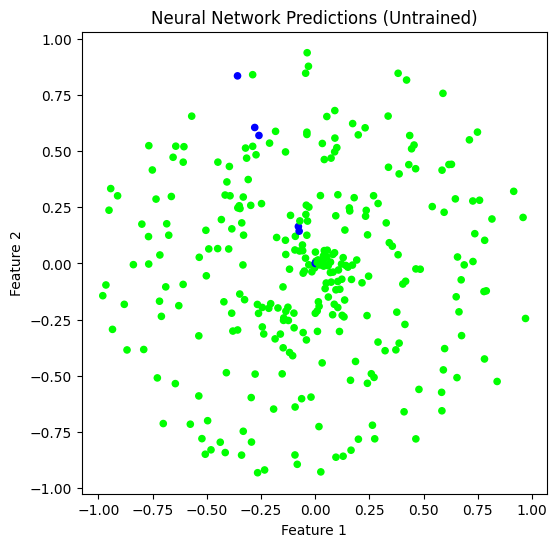

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import nnfs
from nnfs.datasets import spiral_data

nnfs.init()

# ---------------- Dense (Fully Connected) Layer ----------------
class Layer_Dense:
    def __init__(self, n_inputs, n_neurons):
        self.weights = 0.10 * np.random.randn(n_inputs, n_neurons)
        self.biases = np.zeros((1, n_neurons))

    def forward(self, inputs):
        self.output = np.dot(inputs, self.weights) + self.biases

# ---------------- ReLU Activation ----------------
class Activation_ReLU:
    def forward(self, inputs):
        self.output = np.maximum(0, inputs)

# ---------------- Softmax Activation ----------------
class Activation_Softmax:
    def forward(self, inputs):
        exp_values = np.exp(inputs - np.max(inputs, axis=1, keepdims=True))
        self.output = exp_values / np.sum(exp_values, axis=1, keepdims=True)

# ---------------- Create Dataset ----------------
X, y = spiral_data(samples=100, classes=3)
# X shape: (300, 2)
# y shape: (300,)

# ---------------- Build Network ----------------
dense1 = Layer_Dense(2, 3)          # first dense layer (input → hidden)
activation1 = Activation_ReLU()     # ReLU activation

dense2 = Layer_Dense(3, 3)          # second dense layer (hidden → output)
activation2 = Activation_Softmax()  # Softmax activation

# ---------------- Forward Pass ----------------
dense1.forward(X)                   # input → dense1
activation1.forward(dense1.output)  # ReLU

dense2.forward(activation1.output)  # dense2
activation2.forward(dense2.output)  # Softmax

# ---------------- Predictions ----------------
predictions = np.argmax(activation2.output, axis=1)

print("First 5 probability outputs:\n", activation2.output[:5])


# ---------------- Visualization ----------------
plt.figure(figsize=(6, 6))
plt.scatter(X[:, 0], X[:, 1], c=predictions, cmap="brg", s=20)
plt.title("Neural Network Predictions (Untrained)")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

**How to read the plot**

Each dot = one data point

Color = predicted class

Because the network is untrained, the colors look messy

This is expected — weights are random

#Neural Networks from Scratch - P.7 Calculating Loss with Categorical Cross-Entropy

(before backpropagation and optimization)

Categorical Cross-Entropy (CCE) is the loss function used for multi-class classification when your model outputs probabilities (usually from Softmax).

It answers one question:

“How wrong is the model’s predicted probability distribution compared to the true class?”

If the model is confident and correct → low loss

If the model is confident and wrong → very high loss



Simple example

True class = class 1

Predicted probabilities:

[0.1, 0.8, 0.1]


Loss is small because the model assigned high probability (0.8) to the correct class.

Now:

[0.7, 0.2, 0.1]


Loss is large because the model is confident in the wrong class.

Loss=−log(probability of the correct class)

One-hot encoding is a way to represent categorical data (like class labels) as binary vectors, so they can be used in machine learning models.

✅ How it works:

Suppose you have 3 classes: Cat, Dog, Rabbit.

Normally, you might label them as integers:

Cat → 0
Dog → 1
Rabbit → 2


One-hot encoding converts each class into a vector of length = number of classes, where:

The index of the class is set to 1

All other indices are 0

Example:

Class	One-hot encoding
Cat	[1, 0, 0]
Dog	[0, 1, 0]
Rabbit	[0, 0, 1]

✅ Why we use it:

Machine learning models work with numbers, not strings.

Avoids giving an ordinal relationship to classes (e.g., 0 < 1 < 2).

Needed for categorical cross-entropy loss in classification problems.



In [ ]:
import numpy as np

labels = np.array([0, 2, 1, 0])  #Creates a NumPy array called labels with integer class labels.
n_classes = 3

one_hot = np.zeros((labels.size, n_classes))
one_hot[np.arange(labels.size), labels] = 1
print(one_hot)

[[1. 0. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]]


In [ ]:
import numpy as np
import math
b = 5.2
print(np.log(b))
print(math.e ** 1.6486586255873816)

1.6486586255873816
5.199999999999999


In [ ]:
import math

softmax_output = [0.7,0.1,0.2]
target_output = [1,0,0]
#target_class = 0
#loss = -(math.log(softmax_output[0])*target_output[0]+
         #math.log(softmax_output[1])*target_output[1]+
         #math.log(softmax_output[2])*target_output[2])
loss = -math.log(softmax_output[0]*1)
print(loss)
print(-math.log(0.6))
print(-math.log(0.8))
print(-math.log(0.5))
print(-math.log(0.2))
print(-math.log(0.001)) #loss is getting higher

0.35667494393873245
0.5108256237659907
0.2231435513142097
0.6931471805599453
1.6094379124341003
6.907755278982137


#Neural Networks from Scratch - P.8 Implementing Loss


In [ ]:
import numpy as np
softmax_outputs = np.array([[0.7,0.1,0.2],
                           [0.1,0.5,0.4],
                           [0.02,0.9,0.08]])
class_targets = [0,1,1]
print(softmax_outputs[range(len(softmax_outputs)), class_targets])
print(-np.log(softmax_outputs[range(len(softmax_outputs)), class_targets]))
neg_log = -np.log(softmax_outputs[range(len(softmax_outputs)), class_targets])
average_loss = np.mean(neg_log)
print(average_loss)
#-np.log(0) loss is infinite if any item has 0.0



[0.7 0.5 0.9]
[0.35667494 0.69314718 0.10536052]
0.38506088005216804


In [ ]:
import numpy as np

samples = 3
y_pred_clipped = np.array([
    [0.7, 0.1, 0.2],
    [0.1, 0.5, 0.4],
    [0.02, 0.9, 0.08]
])

y_true = np.array([0, 1, 1])

if len(y_true.shape) == 1:  # scalar class labels
    correct_confidences = y_pred_clipped[range(samples), y_true]

print(correct_confidences)


[0.7 0.5 0.9]


In [ ]:
import numpy as np

samples = 3
y_pred_clipped = np.array([
    [0.7, 0.1, 0.2],
    [0.1, 0.5, 0.4],
    [0.02, 0.9, 0.08]
])

y_true = np.array([[1, 0 , 0],
          [0, 1, 0 ],
          [0, 1, 0 ]])

if len(y_true.shape) == 2:
    correct_confidences = np.sum(y_pred_clipped*y_true, axis = 1)
print(correct_confidences)


[0.7 0.5 0.9]


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
!pip install nnfs
import nnfs
from nnfs.datasets import spiral_data

nnfs.init()

# ---------------- Dense (Fully Connected) Layer ----------------
class Layer_Dense:
    def __init__(self, n_inputs, n_neurons):
        self.weights = 0.10 * np.random.randn(n_inputs, n_neurons)
        self.biases = np.zeros((1, n_neurons))

    def forward(self, inputs):
        self.output = np.dot(inputs, self.weights) + self.biases

# ---------------- ReLU Activation ----------------
class Activation_ReLU:
    def forward(self, inputs):
        self.output = np.maximum(0, inputs)

# ---------------- Softmax Activation ----------------
class Activation_Softmax:
    def forward(self, inputs):
        exp_values = np.exp(inputs - np.max(inputs, axis=1, keepdims=True))
        self.output = exp_values / np.sum(exp_values, axis=1, keepdims=True)

# ---------------- Loss ------------------------------
class Loss:
    def calculate(self, output, y):
        sample_losses = self.forward(output,y)
        data_loss = np.mean(sample_losses)
        return data_loss

class Loss_CategoricalCrossentropy(Loss):
    def forward(self, y_pred, y_true):
        samples = len(y_pred)
        y_pred_clipped = np.clip(y_pred, 1e-7, 1-1e-7)

        if len(y_true.shape) == 1:  #passes scalar values not encoded
           correct_confidences = y_pred_clipped[range(samples), y_true]

        elif len(y_true.shape) == 2: #one hot encoded vectors being passed here
            correct_confidences = np.sum(y_pred_clipped*y_true, axis = 1)

        negative_log_likelihoods = -np.log(correct_confidences)
        return negative_log_likelihoods



# ---------------- Create Dataset ----------------
X, y = spiral_data(samples=100, classes=3)
# X shape: (300, 2)
# y shape: (300,)

# ---------------- Build Network ----------------
dense1 = Layer_Dense(2, 3)          # first dense layer (input → hidden)
activation1 = Activation_ReLU()     # ReLU activation

dense2 = Layer_Dense(3, 3)          # second dense layer (hidden → output)
activation2 = Activation_Softmax()  # Softmax activation

# ---------------- Forward Pass ----------------
dense1.forward(X)                   # input → dense1
activation1.forward(dense1.output)  # ReLU

dense2.forward(activation1.output)  # dense2
activation2.forward(dense2.output)  # Softmax

# ---------------- Predictions ----------------
predictions = np.argmax(activation2.output, axis=1)

print("First 5 probability outputs:\n", activation2.output[:5])

loss_function = Loss_CategoricalCrossentropy()
loss = loss_function.calculate(activation2.output,y)
print("loss:", loss)

First 5 probability outputs:
 [[0.33333334 0.33333334 0.33333334]
 [0.33331734 0.3333183  0.33336434]
 [0.3332888  0.33329153 0.33341965]
 [0.33325943 0.33326396 0.33347666]
 [0.33323312 0.33323926 0.33352762]]
loss: 1.098445


In [ ]:
import numpy as np

softmax_outputs = np.array([
    [0.7, 0.2, 0.1],
    [0.5, 0.1, 0.4],                        # Probabilities for sample 2
    [0.02, 0.9, 0.08]                       # Probabilities for sample 3
])

class_targets = [0, 1, 1]                   # True class labels for each sample
predictions = np.argmax(softmax_outputs, axis=1)
                                             # Pick the class with highest probability per sample
accuracy = np.mean(predictions == class_targets)
                                             # Compute accuracy as the fraction of correct predictions
print("acc:", accuracy)


acc: 0.6666666666666666


#Neural Networks from Scratch - P.9 Introducing Optimization and derivatives


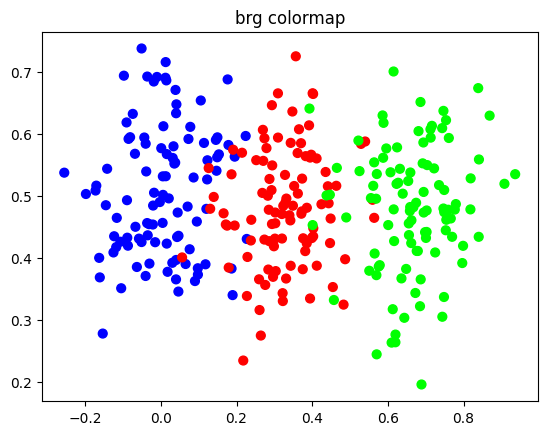

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

!pip install nnfs
import nnfs
from nnfs.datasets import vertical_data

nnfs.init()

X, y = vertical_data(samples=100, classes=3)

# BRG colormap
plt.figure()
plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap='brg')
plt.title("brg colormap")
plt.show()

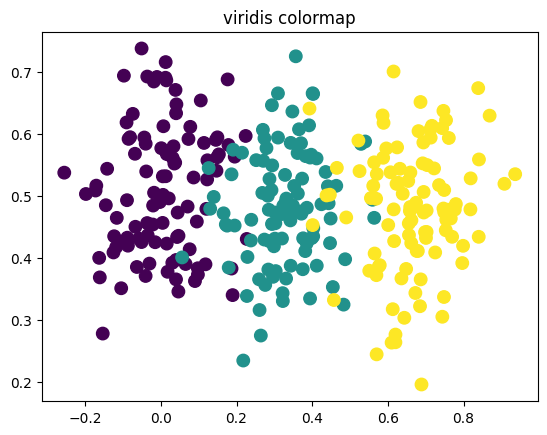

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

!pip install nnfs
import nnfs
from nnfs.datasets import vertical_data

nnfs.init()

X, y = vertical_data(samples=100, classes=3)

# Viridis colormap
plt.figure()
plt.scatter(X[:, 0], X[:, 1], c=y, s=80, cmap='viridis')
plt.title("viridis colormap")
plt.show()

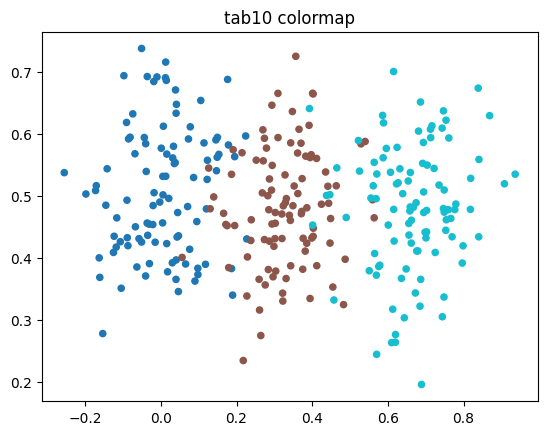

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

!pip install nnfs
import nnfs
from nnfs.datasets import vertical_data

nnfs.init()

X, y = vertical_data(samples=100, classes=3)

# Tab10 colormap
plt.figure()
plt.scatter(X[:, 0], X[:, 1], c=y, s=20, cmap='tab10')
plt.title("tab10 colormap")
plt.show()

In [ ]:
import matplotlib.pyplot as plt
!pip install nnfs
import nnfs
from nnfs.datasets import vertical_data
nnfs.init()

X,y = vertical_data(samples=100, classes=3)

dense1 = Layer_Dense(2,3)
activation1 = Activation_ReLU()
dense2 = Layer_Dense(2,3)
activation2 = Activation_Softmax()

loss_function = Loss_CategoricalCrossentropy()

lowest_loss = 9999999
best_dense1_weights = dense1.weights.copy()
best_dense1_biases = dense1.biases.copy()
best_dense2_weights = dense2.weights.copy()
best_dense2_biases = dense2.biases.copy()

for iteration in range(100000):
    dense1.weights = 0.05 * np.random.randn(2,3)
    dense1.biases  = 0.05 * np.random.randn(1,3)
    dense2.weights = 0.05 * np.random.randn(3,3)
    dense2.biases  = 0.05 * np.random.randn(1,3)

    dense1.forward(X)
    activation1.forward(dense1.output)
    dense2.forward(activation1.output)
    activation2.forward(dense2.output)

    loss = loss_function.calculate(activation2.output, y)

    predictions = np.argmax(activation2.output, axis=1)
    accuracy = np.mean(predictions == y)

    if loss < lowest_loss:
       print("New set of weights found, iteration: ", iteration, "loss: ", loss, "acc: ", accuracy)
       best_dense1_weights = dense1.weights.copy()
       best_dense1_biases = dense1.biases.copy()
       best_dense2_weights = dense2.weights.copy()
       best_dense2_biases = dense2.biases.copy()
       lowest_loss = loss



New set of weights found, iteration:  0 loss:  1.0987809 acc:  0.3333333333333333
New set of weights found, iteration:  9 loss:  1.0983545 acc:  0.33666666666666667
New set of weights found, iteration:  19 loss:  1.0979015 acc:  0.3333333333333333
New set of weights found, iteration:  71 loss:  1.0969089 acc:  0.3333333333333333
New set of weights found, iteration:  1179 loss:  1.0964065 acc:  0.3333333333333333
New set of weights found, iteration:  3863 loss:  1.0963326 acc:  0.3333333333333333
New set of weights found, iteration:  5407 loss:  1.0958136 acc:  0.5833333333333334
New set of weights found, iteration:  55599 loss:  1.0956873 acc:  0.3333333333333333
New set of weights found, iteration:  63519 loss:  1.095564 acc:  0.3333333333333333
New set of weights found, iteration:  77335 loss:  1.0954586 acc:  0.3333333333333333
New set of weights found, iteration:  97886 loss:  1.0954584 acc:  0.3333333333333333


What the code does:

Imports and dataset generation:

Uses nnfs to generate a simple 2D dataset with 3 classes.

X contains the input features (2 per sample), y contains the class labels.

Network setup:

Two dense layers (dense1 and dense2) are created with randomly initialized weights and biases.

First layer output passes through a ReLU activation, second layer output passes through a Softmax activation.

Loss is computed using categorical cross-entropy.

Random search for weights:

Repeats 100,000 times:

Randomly sets new weights and biases for both layers.

Performs forward passes through the network.

Computes the loss and accuracy.

If the loss is lower than any previous one, it saves the weights and biases.

Prints when a better set of weights is found.


😡Why this method is not good:

Inefficient:

It’s basically “guess-and-check” with random weights — extremely slow and computationally wasteful.

No learning:

There’s no gradient-based optimization (like backpropagation) to guide the weights toward lower loss.

Most iterations will produce useless weights.

Doesn’t scale:

Works for tiny datasets and tiny networks, but impossible for real-world data or deeper networks.

Random chance dependent:

Success depends entirely on luck, not systematic learning.

Epoch 0: loss=1.0986, accuracy=0.3333
Epoch 100: loss=1.0954, accuracy=0.6667
Epoch 200: loss=1.0464, accuracy=0.6667
Epoch 300: loss=0.7515, accuracy=0.7900
Epoch 400: loss=0.4843, accuracy=0.9033
Epoch 500: loss=0.3540, accuracy=0.9133
Epoch 600: loss=0.2849, accuracy=0.9300
Epoch 700: loss=0.2463, accuracy=0.9267
Epoch 800: loss=0.2237, accuracy=0.9267
Epoch 900: loss=0.2096, accuracy=0.9267


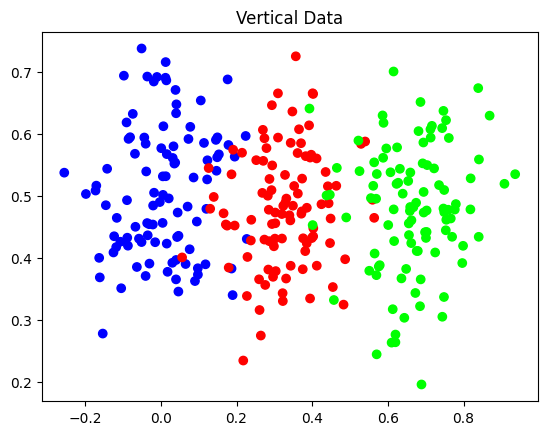

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
!pip install nnfs
import nnfs
from nnfs.datasets import vertical_data

nnfs.init()
X, y = vertical_data(samples=100, classes=3)

class Layer_Dense:
    def __init__(self, n_inputs, n_neurons):
        self.weights = 0.01 * np.random.randn(n_inputs, n_neurons)
        self.biases = np.zeros((1, n_neurons))

    def forward(self, inputs):
        self.output = np.dot(inputs, self.weights) + self.biases

    def backward(self, dvalues, inputs, learning_rate):
        # Gradients w.r.t weights and biases
        self.dweights = np.dot(inputs.T, dvalues)
        self.dbiases = np.sum(dvalues, axis=0, keepdims=True)
        # Gradient w.r.t inputs (for previous layer)
        self.dinputs = np.dot(dvalues, self.weights.T)
        # Update weights and biases
        self.weights -= learning_rate * self.dweights
        self.biases -= learning_rate * self.dbiases

class Activation_ReLU:
    def forward(self, inputs):
        self.output = np.maximum(0, inputs)

    def backward(self, dvalues):
        self.dinputs = dvalues.copy()
        self.dinputs[self.output <= 0] = 0

class Activation_Softmax:
    def forward(self, inputs):
        exp_values = np.exp(inputs - np.max(inputs, axis=1, keepdims=True))
        self.output = exp_values / np.sum(exp_values, axis=1, keepdims=True)

    def backward(self, dvalues):
        self.dinputs = dvalues.copy()

class Loss_CategoricalCrossentropy:
    def calculate(self, y_pred, y_true):
        samples = y_pred.shape[0]
        y_pred_clipped = np.clip(y_pred, 1e-7, 1 - 1e-7)
        correct_confidences = y_pred_clipped[range(samples), y_true]
        negative_log_likelihoods = -np.log(correct_confidences)
        return np.mean(negative_log_likelihoods)

    def backward(self, dvalues, y_true):
        samples = dvalues.shape[0]
        self.dinputs = dvalues.copy()
        self.dinputs[range(samples), y_true] -= 1
        self.dinputs /= samples

dense1 = Layer_Dense(2, 64)
activation1 = Activation_ReLU()
dense2 = Layer_Dense(64, 3)
activation2 = Activation_Softmax()
loss_function = Loss_CategoricalCrossentropy()

learning_rate = 0.1
epochs = 1000

for epoch in range(epochs):
    # Forward pass
    dense1.forward(X)
    activation1.forward(dense1.output)
    dense2.forward(activation1.output)
    activation2.forward(dense2.output)

    # Loss
    loss = loss_function.calculate(activation2.output, y)

    # Accuracy
    predictions = np.argmax(activation2.output, axis=1)
    accuracy = np.mean(predictions == y)

    if epoch % 100 == 0:
        print(f"Epoch {epoch}: loss={loss:.4f}, accuracy={accuracy:.4f}")

    # Backward pass
    loss_function.backward(activation2.output, y)                       # Step 1: dL/dSoftmax
    activation2.backward(loss_function.dinputs)                         # Step 2
    dense2.backward(activation2.dinputs, activation1.output, learning_rate)  # Step 3
    activation1.backward(dense2.dinputs)                                 # Step 4
    dense1.backward(activation1.dinputs, X, learning_rate)              # Step 5


plt.scatter(X[:, 0], X[:, 1], c=y, cmap='brg')
plt.title("Vertical Data")
plt.show()



✅ What this does differently:

Uses gradient descent with backpropagation to adjust weights.

Network actually learns patterns in the data over time.

Prints loss and accuracy every 100 epochs to track learning.

Much faster and reliable than random guessing.

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

def f(x):
    return 2*x**2

p2_delta = 0.0001

x1 = 1
x2 = x1 + p2_delta

y1 = f(x1)
y2 = f(x2)

approximate_derivative = (y2 - y1) / p2_delta
print("Approximate derivative: ", approximate_derivative)


Approximate derivative:  4.000199999998344


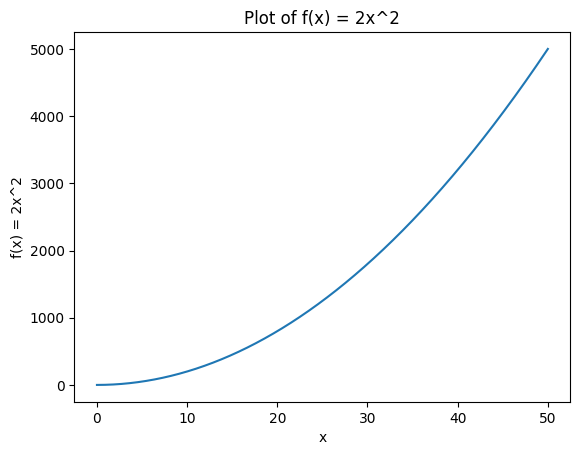

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

def f(x):
    return 2 * x**2

x = np.arange(0, 50, 0.001)
y = f(x)

plt.plot(x, y)
plt.xlabel("x")
plt.ylabel("f(x) = 2x^2")
plt.title("Plot of f(x) = 2x^2")
plt.show()

Approx derivative at x=0.00: 0.00
Approx derivative at x=5.56: 22.22
Approx derivative at x=11.11: 44.44
Approx derivative at x=16.67: 66.67
Approx derivative at x=22.22: 88.89
Approx derivative at x=27.78: 111.11
Approx derivative at x=33.33: 133.33
Approx derivative at x=38.89: 155.56
Approx derivative at x=44.44: 177.78
Approx derivative at x=50.00: 200.00


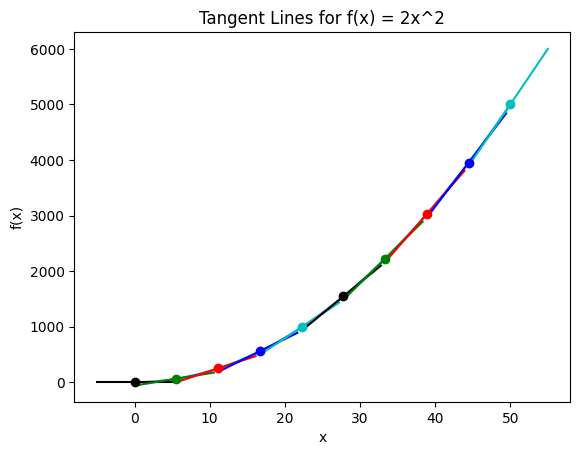

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

def f(x):
    return 2 * x**2

x = np.arange(0, 50, 0.01)
y = f(x)

plt.plot(x, y, label="f(x) = 2x^2")

colors = ['k','g','r','b','c']

def tangent_line(x, slope, b):
    return slope*x + b

# 10 tangent points spread across x
tangent_points = np.linspace(0, 50, 10)

for i, x1 in enumerate(tangent_points):
    x2 = x1 + 0.0001
    y1 = f(x1)
    y2 = f(x2)

    slope = (y2 - y1) / 0.0001
    b = y2 - slope*x2

    to_plot = np.linspace(x1 - 5, x1 + 5, 50)

    plt.scatter(x1, y1, c=colors[i % len(colors)], zorder=5)
    plt.plot(to_plot, tangent_line(to_plot, slope, b),
             c=colors[i % len(colors)], linewidth=1.5)
    print(f"Approx derivative at x={x1:.2f}: {slope:.2f}")

plt.xlabel("x")
plt.ylabel("f(x)")
plt.title("Tangent Lines for f(x) = 2x^2")
plt.show()
